# Credit Card Fraud Detection::

Download dataset from this link:

https://www.kaggle.com/mlg-ulb/creditcardfraud

# Description about dataset::

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 


### Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# WORKFLOW :

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Standardized the Input Variables. 

4.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

5.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

6.Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)

7.Train the Model with Epochs (100).

8.If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .

9.Prediction should be > 92%
10.Evaluation Step
11Prediction


# Task::

## Identify fraudulent credit card transactions.

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

In [2]:
data = pd.read_csv('creditcard.csv')

In [10]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [12]:
x = (data.iloc[:, 0:30])
y = (data.iloc[:, 30])
from sklearn.model_selection import train_test_split
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [16]:
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.28571, random_state=42) #0.285*0.7=0.2

In [17]:
print(data.shape)
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(284807, 31)
(142403, 30)
(85443, 30)
(56961, 30)


In [18]:
model= Sequential()
model.add(Dense(10,activation='relu',input_shape=(x_train.shape[1],)))
model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [19]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
history= model.fit(x_train,y_train,epochs=100)

Epoch 1/100
4451/4451 [==============================] - 4s 691us/step - loss: 1.2788 - accuracy: 0.9873
Epoch 2/100
4451/4451 [==============================] - 3s 684us/step - loss: 1.3435 - accuracy: 0.9853
Epoch 3/100
4451/4451 [==============================] - 3s 699us/step - loss: 1.4898 - accuracy: 0.9840
Epoch 4/100
4451/4451 [==============================] - 3s 704us/step - loss: 1.0818 - accuracy: 0.9851
Epoch 5/100
4451/4451 [==============================] - 3s 693us/step - loss: 1.1871 - accuracy: 0.9864
Epoch 6/100
4451/4451 [==============================] - 3s 692us/step - loss: 1.1797 - accuracy: 0.9850
Epoch 7/100
4451/4451 [==============================] - 3s 689us/step - loss: 0.9026 - accuracy: 0.9853
Epoch 8/100
4451/4451 [==============================] - 3s 710us/step - loss: 0.5521 - accuracy: 0.9884
Epoch 9/100
4451/4451 [==============================] - 3s 697us/step - loss: 0.7840 - accuracy: 0.9860
Epoch 10/100
4451/4451 [==============================]

4451/4451 [==============================] - 4s 800us/step - loss: 0.0485 - accuracy: 0.9974
Epoch 79/100
4451/4451 [==============================] - 4s 856us/step - loss: 0.0381 - accuracy: 0.9969
Epoch 80/100
4451/4451 [==============================] - 3s 782us/step - loss: 0.0443 - accuracy: 0.9960
Epoch 81/100
4451/4451 [==============================] - 3s 777us/step - loss: 0.0293 - accuracy: 0.9980
Epoch 82/100
4451/4451 [==============================] - 4s 788us/step - loss: 0.0274 - accuracy: 0.9982
Epoch 83/100
4451/4451 [==============================] - 4s 838us/step - loss: 0.0475 - accuracy: 0.9967
Epoch 84/100
4451/4451 [==============================] - 4s 827us/step - loss: 0.0795 - accuracy: 0.9974
Epoch 85/100
4451/4451 [==============================] - 4s 955us/step - loss: 0.0348 - accuracy: 0.99800s - loss: 0.0348 - accuracy: 0.99
Epoch 86/100
4451/4451 [==============================] - 4s 862us/step - loss: 0.0320 - accuracy: 0.9971
Epoch 87/100
4451/4451 [=

In [21]:
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'accuracy'])

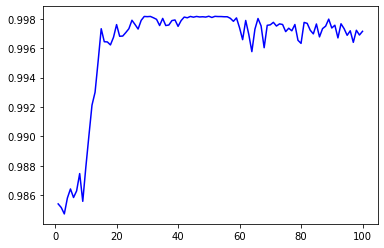

In [23]:
import matplotlib.pyplot as plt
acc=history_dict['accuracy']

epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b',label='acc')


after 25 epoch model become overfil

In [24]:
model= Sequential()
model.add(Dense(10,activation='relu',input_shape=(x_train.shape[1],)))
model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
history= model.fit(x_train,y_train,epochs=25)

Epoch 1/25
4451/4451 [==============================] - 4s 688us/step - loss: 54.2280 - accuracy: 0.9435
Epoch 2/25
4451/4451 [==============================] - 3s 745us/step - loss: 0.9513 - accuracy: 0.9846
Epoch 3/25
4451/4451 [==============================] - 3s 673us/step - loss: 0.8805 - accuracy: 0.9851
Epoch 4/25
4451/4451 [==============================] - 3s 702us/step - loss: 0.6522 - accuracy: 0.9866
Epoch 5/25
4451/4451 [==============================] - 3s 674us/step - loss: 0.6282 - accuracy: 0.9862
Epoch 6/25
4451/4451 [==============================] - 3s 699us/step - loss: 0.5414 - accuracy: 0.9875
Epoch 7/25
4451/4451 [==============================] - 3s 753us/step - loss: 0.4787 - accuracy: 0.9873
Epoch 8/25
4451/4451 [==============================] - 3s 670us/step - loss: 0.2035 - accuracy: 0.9904
Epoch 9/25
4451/4451 [==============================] - 3s 672us/step - loss: 0.0824 - accuracy: 0.9967
Epoch 10/25
4451/4451 [==============================] - 3s 679

In [25]:
result=model.evaluate(x_test,y_test)

2671/2671 [==============================] - 2s 572us/step - loss: 0.0515 - accuracy: 0.9984


In [28]:
predictions=model.predict(x_test)
predictions

array([[4.2571795e-05],
       [1.3669818e-18],
       [2.7093250e-09],
       ...,
       [3.0660148e-11],
       [3.4069479e-26],
       [3.3328123e-13]], dtype=float32)